# Mushroom Classification

The dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. (Kaggle dataset)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Reading the dataset

In [4]:
data = pd.read_csv('mushrooms.csv',sep=',')

# Displaying basic information about the dataset

In [6]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         n          k   ...                          s   
1            c         b          k   ...                          s   
2            c         b          n   ...                          s   
3            c         n          n   ...                          s   
4            w         b          k   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [7]:
data.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
count          8124      8124       8124   ...                       8124   
unique            2         2         12   ...                          4   
top               c         b          b   ...                          s   
freq           6812      5612       1728   ...                       4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [12]:
data.shape

(8124, 23)

# Ques : Visualize the number of mushrooms for each cap color category

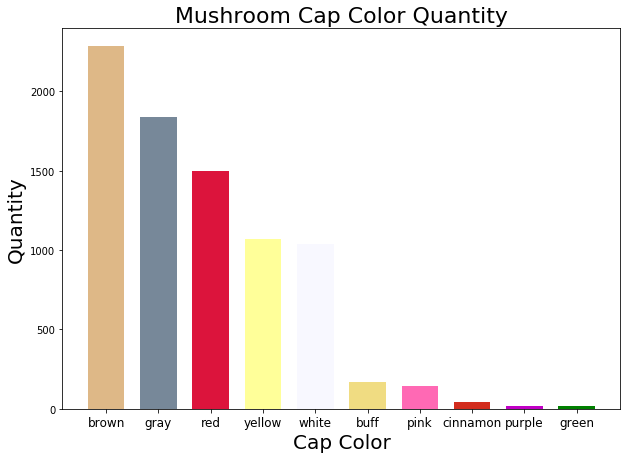

In [61]:
cap_colors = data['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
cap_color_labels = cap_colors.axes[0].tolist()

ind = np.arange(10)
width = 0.7
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig,axes = plt.subplots(figsize=(10,7))
mushroom_bar = axes.bar(ind, m_height,width,color=colors)

axes.set_xlabel("Cap Color",fontsize=20)
axes.set_ylabel("Quantity",fontsize=20)
axes.set_title("Mushroom Cap Color Quantity",fontsize=22)
axes.set_xticks(ind)
axes.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bar)
plt.show()

# Ques : Visualize the number of mushrooms which are edible or poisonous based on cap-color

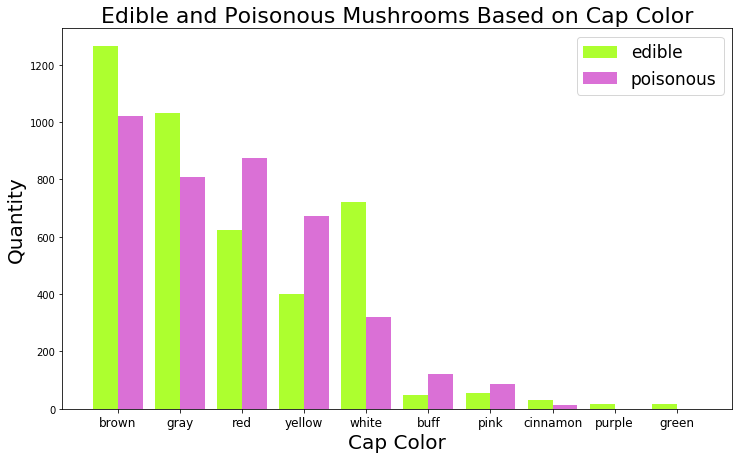

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [62]:
poisonous = []
edible = []
for capcolor in cap_color_labels:
    size = len(data[data['cap-color']==capcolor].index)
    edibles = len(data[(data['cap-color'] == capcolor) & (data['class'] == 'e')].index)
    edible.append(edibles)
    poisonous.append(size-edibles)
    
width = 0.4
fig, axes = plt.subplots(figsize=(12,7))
edible_bar = axes.bar(ind, edible , width, color='#ADFF2F')
poison_bar = axes.bar(ind+width, poisonous , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
axes.set_xlabel("Cap Color",fontsize=20)
axes.set_ylabel('Quantity',fontsize=20)
axes.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
axes.set_xticks(ind + width / 2) #Positioning on the x axis
axes.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
axes.legend((edible_bar,poison_bar),('edible','poisonous'),fontsize=17)
#autolabel(edible_bar, 10)
#autolabel(poison_bar, 10)
plt.show()
print(edible)
print(poisonous)

# Ques : Visualize number of mushrooms based on odor

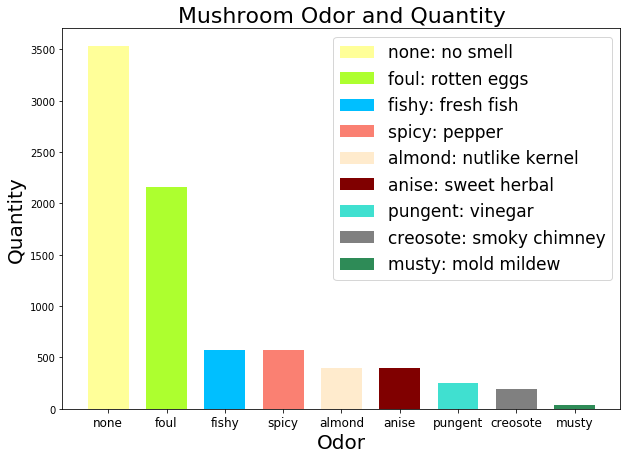

In [57]:
odors = data['odor'].value_counts()
odor_height = odors.values.tolist() 
odor_labels = odors.axes[0].tolist()

width = 0.7 
ind = np.arange(9)  
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, axes = plt.subplots(figsize=(10,7))
odor_bars = axes.bar(ind, odor_height , width, color=colors)
    
axes.set_xlabel("Odor",fontsize=20)
axes.set_ylabel('Quantity',fontsize=20)
axes.set_title('Mushroom Odor and Quantity',fontsize=22)
axes.set_xticks(ind) #Positioning on the x axis
axes.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
axes.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
#autolabel(odor_bars)        
plt.show() #Display bars. 

# Ques : Visualize number of mushrooms which are edible or poisonous base on odour

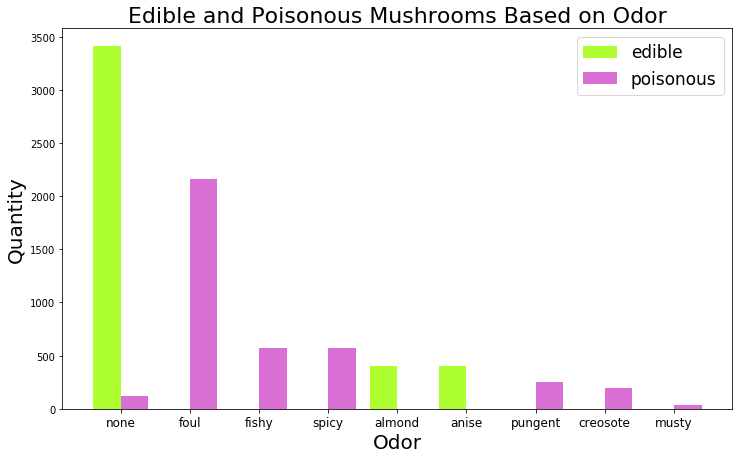

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [58]:
poisonous_od = [] 
edible_od = []    
for odor in odor_labels:
    size = len(data[data['odor'] == odor].index)
    edibles = len(data[(data['odor'] == odor) & (data['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
width = 0.40
fig, axes = plt.subplots(figsize=(12,7))
edible_bars = axes.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = axes.bar(ind+width, poisonous_od , width, color='#DA70D6')

axes.set_xlabel("Odor",fontsize=20)
axes.set_ylabel('Quantity',fontsize=20)
axes.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
axes.set_xticks(ind + width / 2) #Positioning on the x axis
axes.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
axes.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
#autolabel(edible_bars, 10)
#autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

# Ques : Visualize edible and poisonous percentages of mushroom based on population types

[4040, 1712, 1248, 400, 384, 340]


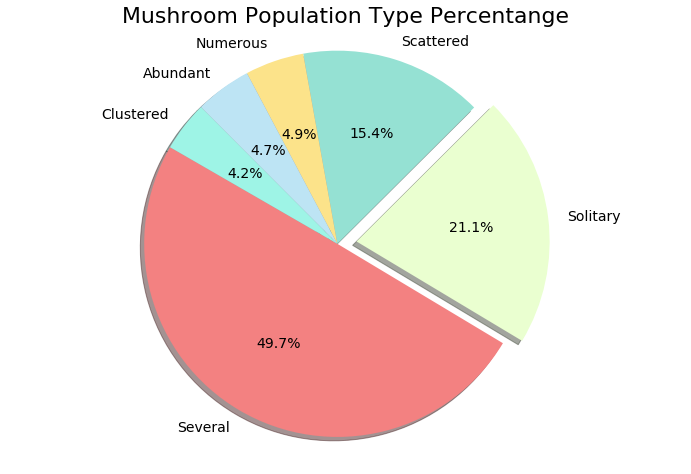

In [48]:
populations = data['population'].value_counts()
pop_size = populations.values.tolist() 
pop_types = populations.axes[0].tolist() 
print(pop_size)

pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  
fig = plt.figure(figsize=(12,8))


plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

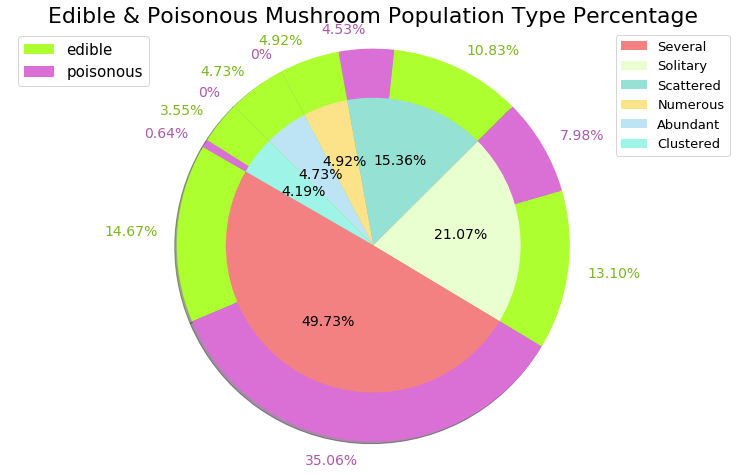

In [50]:
poisonous_pop = [] 
edible_pop = []    
for pop in pop_types: 
    size = len(data[data['population'] == pop].index)
    edibles = len(data[(data['population'] == pop) & (data['class'] == 'e')].index)
    edible_pop.append(edibles) 
    poisonous_pop.append(size-edibles) 
combine_ed_poi = []
for i in range(0,len(edible_pop)):  
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])

fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Population Type Percentage', fontsize=22)
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
                  '3.55%','0.64%'] 

patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, labels= percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') 
    else:
        texts1[i].set_color('#AE59AB') 
    texts1[i].set_fontsize(14)         

patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  
    aut.set_horizontalalignment('center') 

first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) 
plt.axis('equal')
plt.show()

# Ques : Visualize the mushrooms that can be eaten based on their habitat

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64


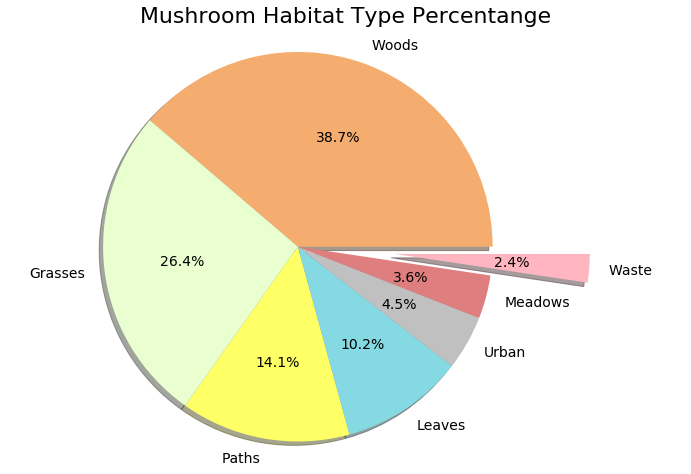

In [51]:
habitats = data['habitat'].value_counts()
hab_size = habitats.values.tolist() 
hab_types = habitats.axes[0].tolist() 
print(habitats)

hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)  
fig = plt.figure(figsize=(12,8))

plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

[1880, 1408, 136, 240, 96, 256, 192]
[1268, 740, 1008, 592, 272, 36, 0]
[1880, 1268, 1408, 740, 136, 1008, 240, 592, 96, 272, 256, 36, 192, 0]


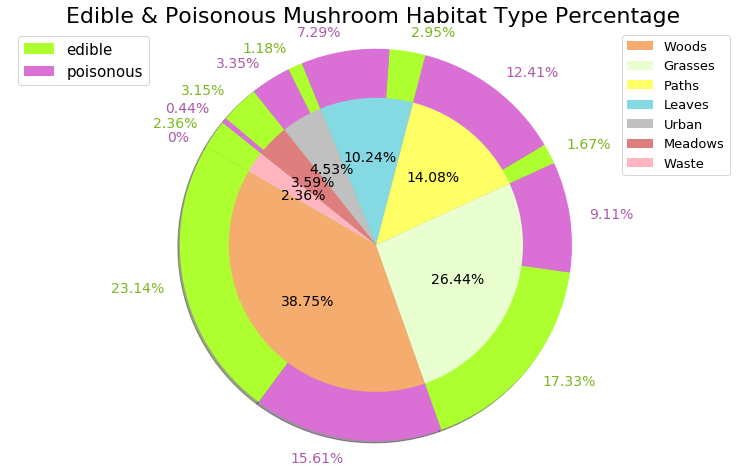

In [52]:
poisonous_hab = [] 
edible_hab = []    
for hab in hab_types: 
    size = len(data[data['habitat'] == hab].index)
    edibles = len(data[(data['habitat'] == hab) & (data['class'] == 'e')].index)
    edible_hab.append(edibles) 
    poisonous_hab.append(size-edibles) 
combine_ed_poi = []
for i in range(0,len(edible_hab)):  
    combine_ed_poi.append(edible_hab[i])
    combine_ed_poi.append(poisonous_hab[i])
print(edible_hab) 
print(poisonous_hab) 
print(combine_ed_poi)

fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Habitat Type Percentage', fontsize=22)
percentages_e_p = ['23.14%','15.61%','17.33%', '9.11%','1.67%','12.41%','2.95%','7.29%','1.18%','3.35%',
                  '3.15%','0.44%','2.36%','0%'] 

patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') 
    else:
        texts1[i].set_color('#AE59AB') 
    texts1[i].set_fontsize(14)         
    
patches2, texts2, autotexts2 = plt.pie(hab_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  
    aut.set_horizontalalignment('center') 

first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, hab_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) 
plt.axis('equal')
plt.show()

In [54]:
mushrooms_sample = data.loc[np.random.choice(data.index, 1000, False)]
mushrooms_sample['cap-color'].unique()

array(['y', 'g', 'w', 'n', 'c', 'b', 'p', 'e', 'u', 'r'], dtype=object)

In [55]:
capcolor = mushrooms_sample['cap-color']
capcolor.value_counts()

n    290
g    220
e    181
y    140
w    131
p     14
b     12
c      6
r      4
u      2
Name: cap-color, dtype: int64